#Machine Learning With Python: Linear Regression With One Variable</h2>  

Machine Learning With Python: Linear Regression With One Variable   [[codebasics github]](https://github.com/codebasics/py/blob/master/ML/1_linear_reg/1_linear_regression.ipynb)        [[Youtube 15 min]](https://www.youtube.com/watch?v=8jazNUpO3lQ)

## Pre-requisite

### directory creation and cleanup, load lib, git clone

In [1]:
import os
import shutil

In [2]:
SRC_LOC='/content/py/ML/1_linear_reg/'
SRC_FILES_DIRS = SRC_LOC + '*'
DST_LOC='/content/'
WORKING_DIR=DST_LOC+'01_Linear_Reg/'
!python --version

Python 3.7.12


In [3]:
shutil.rmtree('/content')
os.mkdir('/content')
os.mkdir(WORKING_DIR)

os.chdir("/content/")
CWD = os.getcwd()
print(f"CWD={CWD}")

if os.path.isdir('py'):
  shutil.rmtree('py')

!git clone https://github.com/codebasics/py

#!cp -R /content/py/ML/1_linear_reg/* /content/01_Linear_Reg/

os.system('cp -R ' + SRC_FILES_DIRS + ' ' + WORKING_DIR) 

os.chdir(WORKING_DIR)

CWD=/content
Cloning into 'py'...
remote: Enumerating objects: 2873, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 2873 (delta 33), reused 52 (delta 18), pack-reused 2801
Receiving objects: 100% (2873/2873), 196.64 MiB | 35.51 MiB/s, done.
Resolving deltas: 100% (1112/1112), done.
Checking out files: 100% (1388/1388), done.


## Sample problem of predicting home price in monroe, new jersey (USA)

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="https://github.com/codebasics/py/raw/master/ML/1_linear_reg/homepricetable.JPG" width="200">

## Problem Statement -  
Given above data build a machine learning model that can predict home prices based on square feet area

You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="https://github.com/codebasics/py/raw/master/ML/1_linear_reg/scatterplot.JPG" width="400">

You can draw multiple lines like below but we choose the one where total sum of error is minimum

<img src="https://github.com/codebasics/py/raw/master/ML/1_linear_reg/equation.PNG" width="500">

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="https://github.com/codebasics/py/raw/master/ML/1_linear_reg/linear_equation.png" width="600">

## Linear Regression - One Variable

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('homeprices.csv')
#print(df)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


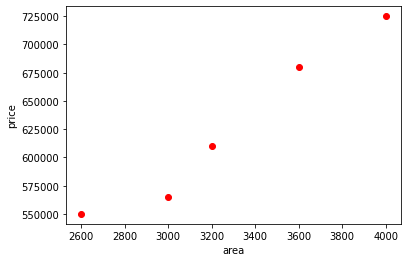

In [6]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red',marker='o')

In [7]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

## Create linear regression object

In [9]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

print(f"m={round(reg.coef_[0],3)}, b={round(reg.intercept_,3)}")

m=135.788, b=180616.438



<img src="https://github.com/codebasics/py/raw/master/ML/1_linear_reg/linear_equation.png" width="600">

### Prediction

**(1) Predict price of a home with area = 3300 sqr ft**

In [10]:
area = 3300
reg.predict([[area]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [11]:
reg.coef_

array([135.78767123])

In [12]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [13]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [14]:
reg.predict([[5000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [15]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [16]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [17]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [18]:
area_df.to_csv("prediction.csv")

<h3>Exercise</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

<h3>Answer</h3>

41288.69409442

# Machine Learning With Python: Linear Regression Multiple Variables
Machine Learning With Python: Linear Regression Multiple Variables [[github - codebasics]](https://github.com/codebasics/py/blob/master/ML/2_linear_reg_multivariate/2_linear_regression_multivariate.ipynb) [[youtube (14 min)]](https://www.youtube.com/watch?v=J_LnPL3Qg70)

## Pre-requisite

### directory creation and cleanup, load lib, git clone

In [19]:
import os
import shutil

In [20]:
SRC_LOC='/content/py/ML/2_linear_reg_multivariate/'
SRC_FILES_DIRS = SRC_LOC + '*'
DST_LOC='/content/'
WORKING_DIR=DST_LOC+'01_Linear_Reg/'
!python --version

Python 3.7.12


In [21]:
## shutil.rmtree('/content')
## os.mkdir('/content')
## os.mkdir(WORKING_DIR)

## os.chdir("/content/")
## CWD = os.getcwd()
## print(f"CWD={CWD}")

## if os.path.isdir('py'):
##   shutil.rmtree('py')

## !git clone https://github.com/codebasics/py

#SRC_LOC='/content/py/ML/2_linear_reg_multivariate/'
#DST_LOC='/content/'

#!cp -R /content/py/ML/2_linear_reg_multivariate/* /content/01_Linear_Reg/

os.system('cp -R ' + SRC_FILES_DIRS + ' ' + WORKING_DIR) 

os.chdir(WORKING_DIR)

## Sample problem of predicting home price in monroe, new jersey (USA).

Below is the table containing home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years)**. Given these prices we have to predict prices of new homes based on area, bed rooms and age.

<img src="https://github.com/codebasics/py/raw/master/ML/2_linear_reg_multivariate/homeprices.jpg" width="300">

Given these home prices find out price of a home that has,

3000 sqr ft area, 3 bedrooms, 40 year old

2500 sqr ft area, 4 bedrooms, 5 year old

We will use regression with multiple variables here. Price can be calculated using following equation.

Here area, bedrooms, age are called independant variables or features whereas price is a dependant variable

<img src="https://github.com/codebasics/py/raw/master/ML/2_linear_reg_multivariate/equation.jpg" width="600">

## Data Preprocessing

In [22]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [23]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### Fill NA values with median value of a column

In [24]:
df.bedrooms.median()

4.0

In [25]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


## Linear Regression - Multiple Variables

In [26]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

print(f"m={np.round(reg.coef_, 3)}, b={np.round(reg.intercept_,3)}")

m=[  112.062 23388.88  -3231.718], b=221323.002


<img src="https://github.com/codebasics/py/raw/master/ML/2_linear_reg_multivariate/equation.jpg" width="600">

## Prediction
Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [27]:
area, nBed, nAge = 3000, 3, 40
price=reg.predict([[area, nBed, nAge]])[0]
print(f"House price for (area={area}, bedrooms={nBed}, age={nAge}) = {round(price,3)}")

House price for (area=3000, bedrooms=3, age=40) = 498408.252


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old

In [28]:
area, nBed, nAge = 2500, 4, 5
price=reg.predict([[area, nBed, nAge]])[0]
print(f"House price for (area={area}, bedrooms={nBed}, age={nAge}) = {round(price,3)}")

House price for (area=2500, bedrooms=4, age=5) = 578876.037


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Exercise

In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

### Answer

#### Key
53713.86 and 93747.79